Task - 2 Prediction using descision tree algorithm
Name - Omkar Sangpal

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 

In [5]:
df = pd.read_csv('Iris.csv')

In [6]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.drop('Id',
  axis='columns', inplace=True)

In [12]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
Species =df.values[:,4] 


In [14]:
columns_except_species=df.columns[:4]
columns_except_species

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [15]:
X_train = df.drop('Species', axis=1)
Y_train = df['Species']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
# splitting data in training set(80%) and test set(20%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3,random_state=100)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt=dt.fit(x_train, y_train)

In [19]:
act = accuracy_score(y_train,dt.predict(x_train))
print('Training Accuracy is: ',(act*100))

Training Accuracy is:  100.0


In [20]:
act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))

Test Accuracy is:  95.55555555555556


In [21]:

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

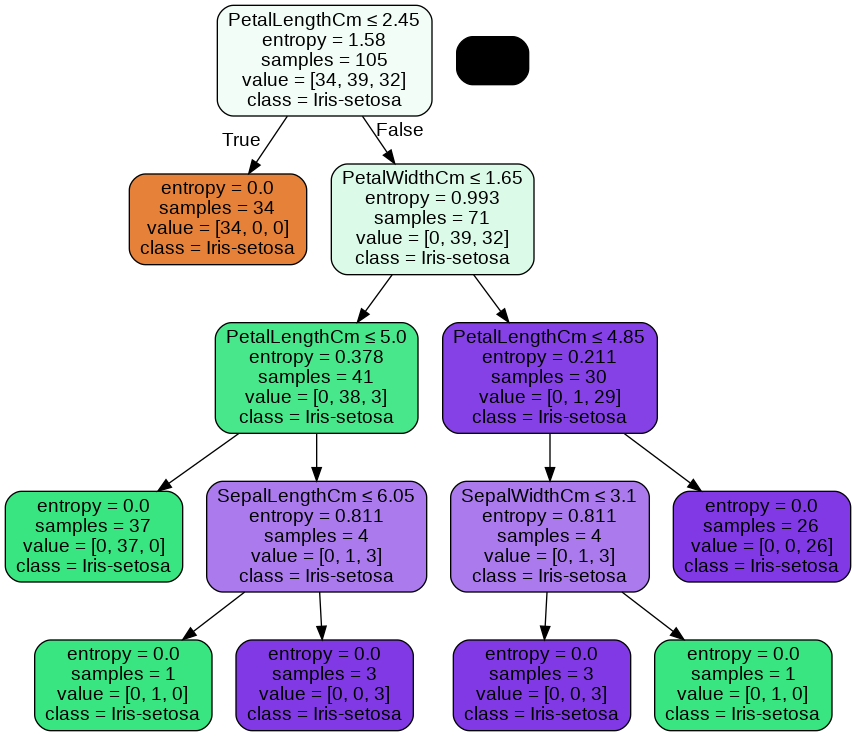

In [22]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names =columns_except_species,class_names = Species)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())